# 🧩 Análise Exploratória de Dados (EDA)

> Este notebook tem como objetivo explorar e compreender o conjunto de dados da **Camada Bronze (PostgreSQL)**, realizando as etapas iniciais de **inspeção, padronização e limpeza dos dados**.

A Análise Exploratória de Dados (EDA) permite identificar padrões, valores ausentes, distribuições, outliers e relações entre variáveis, fornecendo a base necessária para as próximas etapas do pipeline — **criação da Camada Silver** e **engenharia de atributos**.

Durante este processo são realizadas ações como:
- 🔍 Verificação dos tipos de dados e consistência dos registros  
- 🧹 Tratamento e conversão de colunas para tipos adequados (*int*, *float*, *category*)  
- 🚫 Detecção de valores nulos e análise de sua distribuição  
- 📊 Visualizações iniciais (Boxplots, Countplots, Pairplots) para entender tendências e possíveis anomalias  

O resultado final deste notebook será a **tabela Silver**, que consolida o dataset limpo e padronizado, pronta para análises mais profundas e modelagem preditiva.


In [93]:
import os
import sys

#Pega o caminho absoluto para a pasta raiz do projeto (OBESITY_PROJECT)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

#Adiciona a pasta raiz (que contém 'src') ao caminho de busca do Python
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils.db_connection import get_data

#### Importação das bibliotecas

In [94]:
#Manipulação de dados
import pandas as pd

#Visualização de dados
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a tabela do PostgreSQL e realizando os primeiros passos da análise exploratória

In [95]:
#Query simples para ler a tabela bronze
query = "SELECT * FROM obesity"
df = get_data(query)

In [96]:
#Conferindo as primeiras linhas
df.head()

,genero,idade,altura (m),peso (kg),historico_familiar,consumo_frequente_alimentos_caloricos,consumo_frequente_vegetais,numero_refeicoes_principais_dia,consumo_lanches_entre_refeicoes,habito_fumar,consumo_diario_agua,monitora_caloria_diaria,frequencia_semanal_atividade_fisica,tempo_uso_dispositivo,consumo_bebida_alcoolica,transporte_habitual,classe_peso_corporal
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [97]:
#Verificando a quantidade de registros
print(f'Quantidade de linhas e colunas: {df.shape}')

Quantidade de linhas e colunas: (2111, 17)


In [98]:
#Verificando o tipo de dados de cada coluna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   genero                                 2111 non-null   object 
 1   idade                                  2111 non-null   float64
 2   altura (m)                             2111 non-null   float64
 3   peso (kg)                              2111 non-null   float64
 4   historico_familiar                     2111 non-null   object 
 5   consumo_frequente_alimentos_caloricos  2111 non-null   object 
 6   consumo_frequente_vegetais             2111 non-null   float64
 7   numero_refeicoes_principais_dia        2111 non-null   float64
 8   consumo_lanches_entre_refeicoes        2111 non-null   object 
 9   habito_fumar                           2111 non-null   object 
 10  consumo_diario_agua                    2111 non-null   float64
 11  moni

In [99]:
df.head(2)

,genero,idade,altura (m),peso (kg),historico_familiar,consumo_frequente_alimentos_caloricos,consumo_frequente_vegetais,numero_refeicoes_principais_dia,consumo_lanches_entre_refeicoes,habito_fumar,consumo_diario_agua,monitora_caloria_diaria,frequencia_semanal_atividade_fisica,tempo_uso_dispositivo,consumo_bebida_alcoolica,transporte_habitual,classe_peso_corporal
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [100]:
df.tail(2)

,genero,idade,altura (m),peso (kg),historico_familiar,consumo_frequente_alimentos_caloricos,consumo_frequente_vegetais,numero_refeicoes_principais_dia,consumo_lanches_entre_refeicoes,habito_fumar,consumo_diario_agua,monitora_caloria_diaria,frequencia_semanal_atividade_fisica,tempo_uso_dispositivo,consumo_bebida_alcoolica,transporte_habitual,classe_peso_corporal
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


#### Padronização dos tipos: evita erros de modelagem e facilita a análise exploratória

In [101]:
df.columns

Index(['genero', 'idade', 'altura (m)', 'peso (kg)', 'historico_familiar',
       'consumo_frequente_alimentos_caloricos', 'consumo_frequente_vegetais',
       'numero_refeicoes_principais_dia', 'consumo_lanches_entre_refeicoes',
       'habito_fumar', 'consumo_diario_agua', 'monitora_caloria_diaria',
       'frequencia_semanal_atividade_fisica', 'tempo_uso_dispositivo',
       'consumo_bebida_alcoolica', 'transporte_habitual',
       'classe_peso_corporal'],
      dtype='object')

In [102]:
#Padronização de nomes das colunas
df.columns = (
    df.columns.str.strip()  #Remove espaços em branco no início e no fim
    .str.lower()           #Converte para minúsculas
    .str.replace(' ', '_') #Substitui espaços por underscores
    .str.replace('[()]', '', regex=True) #Remove parênteses
)

In [103]:
df.columns

Index(['genero', 'idade', 'altura_m', 'peso_kg', 'historico_familiar',
       'consumo_frequente_alimentos_caloricos', 'consumo_frequente_vegetais',
       'numero_refeicoes_principais_dia', 'consumo_lanches_entre_refeicoes',
       'habito_fumar', 'consumo_diario_agua', 'monitora_caloria_diaria',
       'frequencia_semanal_atividade_fisica', 'tempo_uso_dispositivo',
       'consumo_bebida_alcoolica', 'transporte_habitual',
       'classe_peso_corporal'],
      dtype='object')

In [121]:
#Conversão de tipos
cols_int = ['idade', 'consumo_frequente_vegetais', 'numero_refeicoes_principais_dia', 'consumo_diario_agua', 'frequencia_semanal_atividade_fisica', 'tempo_uso_dispositivo']
cols_float = ['altura_m', 'peso_kg']
cols_cat = [col for col in df.columns if col not in cols_int and col not in cols_float]

#Tratamento para evitar erros de tipo
for col in cols_int:
    df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')

for col in cols_float:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float')

for col in cols_cat:
    df[col] = df[col].astype('category')

print("Dados carregados e preparados com sucesso.")
print(df.info())

Dados carregados e preparados com sucesso.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   genero                                 2111 non-null   category
 1   idade                                  2111 non-null   Int64   
 2   altura_m                               2111 non-null   float64 
 3   peso_kg                                2111 non-null   float64 
 4   historico_familiar                     2111 non-null   category
 5   consumo_frequente_alimentos_caloricos  2111 non-null   category
 6   consumo_frequente_vegetais             2111 non-null   Int64   
 7   numero_refeicoes_principais_dia        2111 non-null   Int64   
 8   consumo_lanches_entre_refeicoes        2111 non-null   category
 9   habito_fumar                           2111 non-null   category
 10  consumo_diario_ag

In [129]:
#Gerando um dicionário de Tradução para fácil leitura dos dados
#Mapeia os nomes internos (inglês) para nomes amigáveis (português)
mapa_nomes = {
    #Colunas
    'idade': 'Idade',
    'peso_kg': 'Peso (kg)',
    'altura_m': 'Altura (m)',
    'classe_peso_corporal': 'Classe de Peso',
    'historico_familiar': 'Histórico Familiar',
    'consumo_frequente_alimentos_caloricos': 'Consome Alim. Calóricos (FAVC)',
    'frequencia_semanal_atividade_fisica': 'Atividade Física Semanal (FAF)',
    'transporte_habitual': 'Transporte Habitual (MTRANS)',
    
    #Valores da Classe (Alvo)
    'Insufficient_Weight': 'Peso Insuficiente',
    'Normal_Weight': 'Peso Normal',
    'Overweight_Level_I': 'Sobrepeso Nível I',
    'Overweight_Level_II': 'Sobrepeso Nível II',
    'Obesity_Type_I': 'Obesidade Tipo I',
    'Obesity_Type_II': 'Obesidade Tipo II',
    'Obesity_Type_III': 'Obesidade Tipo III',
    
    #Valores de Features (Exemplos)
    'yes': 'Sim',
    'no': 'Não',
    'Sometimes': 'Às vezes',
    'Frequently': 'Frequentemente',
    'Always': 'Sempre',
    'Public_Transportation': 'Transporte Público',
    'Automobile': 'Automóvel',
    'Walking': 'Caminhada',
    'Motorbike': 'Motocicleta',
    'Bike': 'Bicicleta'
}

#### Verificando nulos e estatisticas iniciais

In [105]:
#Verificando dados nulos
print(f'\nVerificando a presença de dados nulos:')
print("=" * 40)
print(df.isnull().sum())


Verificando a presença de dados nulos:
genero                                   0
idade                                    0
altura_m                                 0
peso_kg                                  0
historico_familiar                       0
consumo_frequente_alimentos_caloricos    0
consumo_frequente_vegetais               0
numero_refeicoes_principais_dia          0
consumo_lanches_entre_refeicoes          0
habito_fumar                             0
consumo_diario_agua                      0
monitora_caloria_diaria                  0
frequencia_semanal_atividade_fisica      0
tempo_uso_dispositivo                    0
consumo_bebida_alcoolica                 0
transporte_habitual                      0
classe_peso_corporal                     0
dtype: int64


<Axes: >

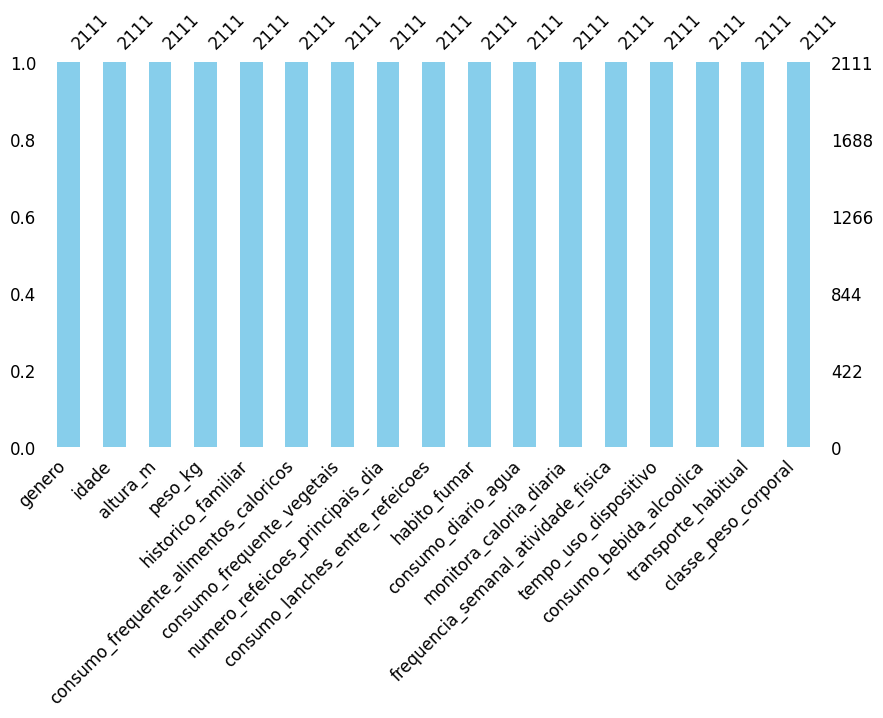

In [106]:
#Verificando valores ausentes com visualização gráfica
msno.bar(df, figsize=(10, 5), color='skyblue', fontsize=12)

In [120]:
#Informações das estatísticas descritivas
print(f'\nEstatísticas descritivas das colunas numéricas:')
print("=" * 100)
df.describe().T


Estatísticas descritivas das colunas numéricas:


,count,mean,std,min,25%,50%,75%,max
idade,2111.0,24.315964,6.357078,14.0,20.0,23.0,26.0,61.0
altura_m,2111.0,1.701677,0.093305,1.45,1.63,1.700499,1.768464,1.98
peso_kg,2111.0,86.586058,26.191172,39.0,65.473343,83.0,107.430682,173.0
consumo_frequente_vegetais,2111.0,2.423496,0.583905,1.0,2.0,2.0,3.0,3.0
numero_refeicoes_principais_dia,2111.0,2.687826,0.80968,1.0,3.0,3.0,3.0,4.0
consumo_diario_agua,2111.0,2.014685,0.688616,1.0,2.0,2.0,2.0,3.0
frequencia_semanal_atividade_fisica,2111.0,1.006632,0.895462,0.0,0.0,1.0,2.0,3.0
tempo_uso_dispositivo,2111.0,0.664614,0.674009,0.0,0.0,1.0,1.0,2.0


In [108]:
#Informações das variáveis categóricas
print(f'\nEstatísticas descritivas das colunas categóricas:')
print("=" * 40)
for col in cols_cat:
    print(f'\n')
    print(df[col].value_counts(normalize=True).round(2) * 100)
    


Estatísticas descritivas das colunas categóricas:


genero
Male      51.0
Female    49.0
Name: proportion, dtype: float64


historico_familiar
yes    82.0
no     18.0
Name: proportion, dtype: float64


consumo_frequente_alimentos_caloricos
yes    88.0
no     12.0
Name: proportion, dtype: float64


consumo_lanches_entre_refeicoes
Sometimes     84.0
Frequently    11.0
Always         3.0
no             2.0
Name: proportion, dtype: float64


habito_fumar
no     98.0
yes     2.0
Name: proportion, dtype: float64


monitora_caloria_diaria
no     95.0
yes     5.0
Name: proportion, dtype: float64


consumo_bebida_alcoolica
Sometimes     66.0
no            30.0
Frequently     3.0
Always         0.0
Name: proportion, dtype: float64


transporte_habitual
Public_Transportation    75.0
Automobile               22.0
Walking                   3.0
Motorbike                 1.0
Bike                      0.0
Name: proportion, dtype: float64


classe_peso_corporal
Obesity_Type_I         17.0
Obesity_Type

#### Análise de correlação

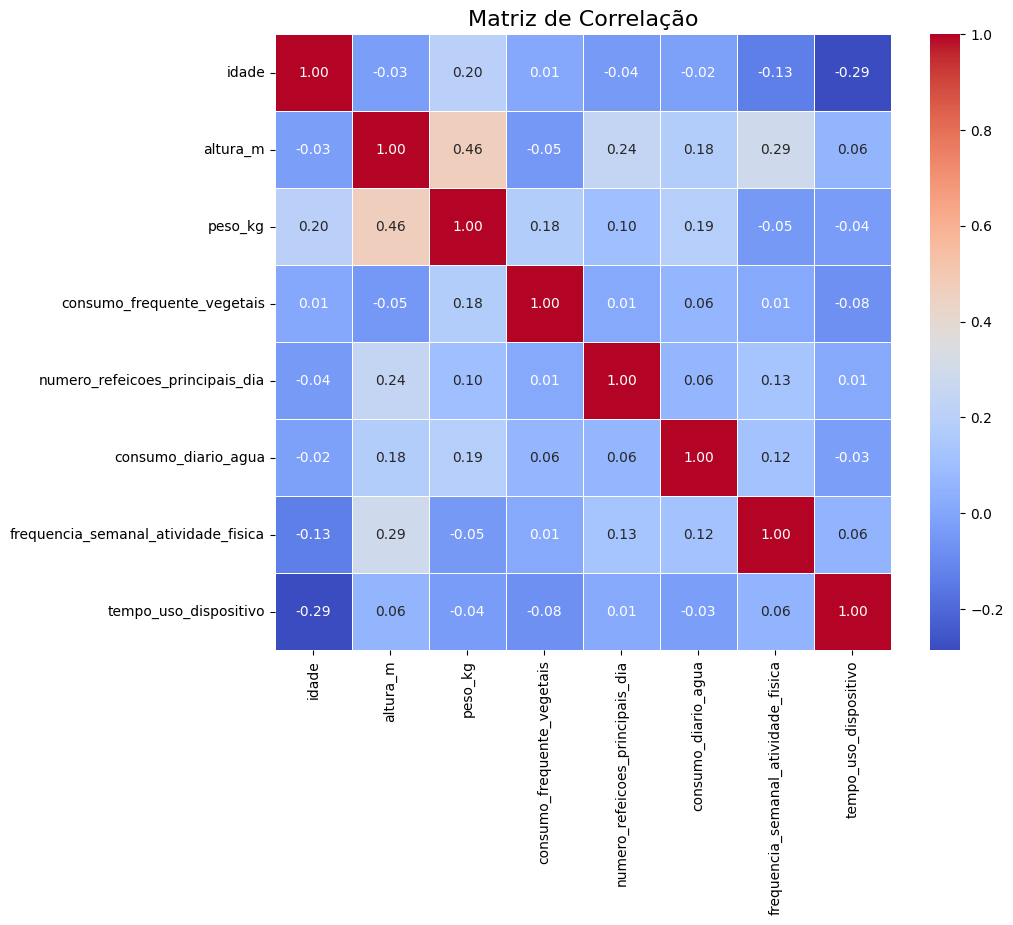

In [117]:
#Correlação entre variáveis numéricas
try:
    # Correlação entre variáveis numéricas
    correlation_matrix = df.corr(method='pearson', numeric_only=True)

    # Plotar o heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
    plt.title('Matriz de Correlação', fontsize=16)
    plt.show()

except Exception as e:
    print(f"\nOcorreu um erro: {e}")

C:\Users\lo-ru\AppData\Local\Temp\ipykernel_17952\251812850.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["classe_peso_corporal"] = df["classe_peso_corporal"].replace(mapa_nomes)


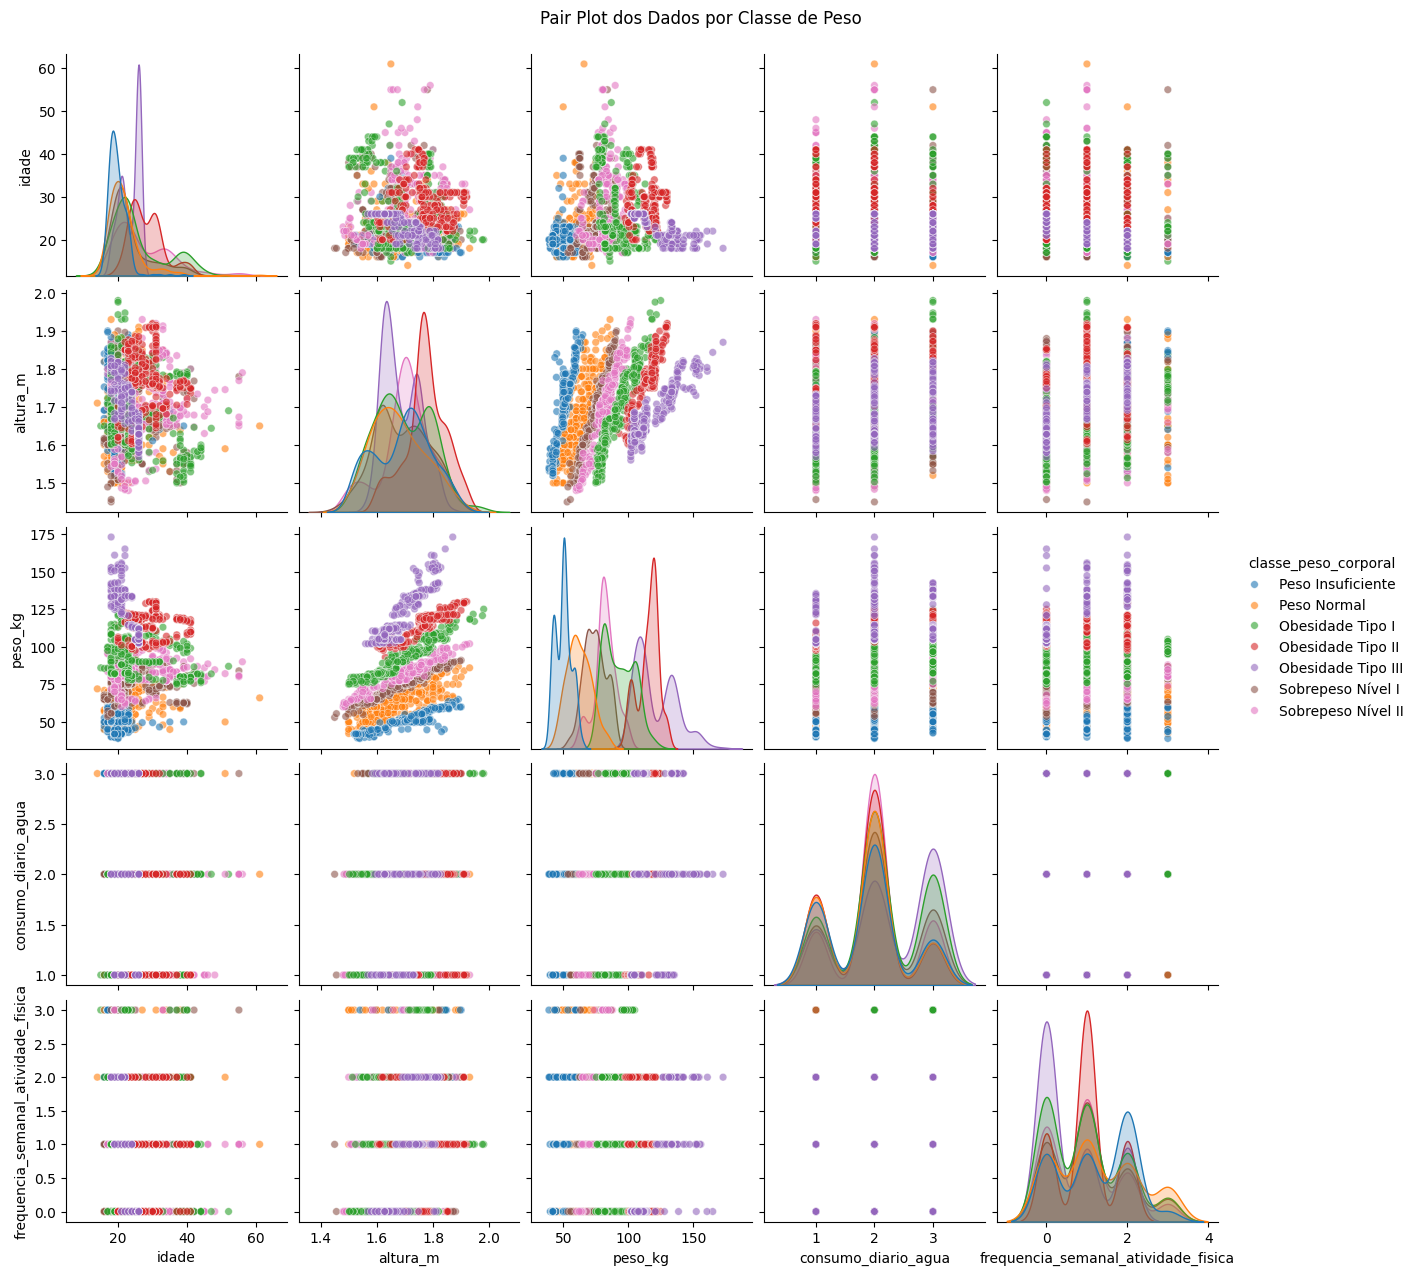

In [138]:
#Complementando a visualização da matriz de correlação com pairplot
df["classe_peso_corporal"] = df["classe_peso_corporal"].replace(mapa_nomes)
sns.pairplot(
    df,
    vars=['idade', 'altura_m', 'peso_kg', 'consumo_diario_agua', 'frequencia_semanal_atividade_fisica'],
    hue='classe_peso_corporal',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 30},
    height=2.5
)
plt.suptitle("Pair Plot dos Dados por Classe de Peso", y=1.02)
plt.show()

#### Respondendo perguntas

In [128]:
#Verificando informação da coluna classe peso corporal
df['classe_peso_corporal'].value_counts()

classe_peso_corporal
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

#### Como as variáveis númericas (idade, peso e altura) se distribuem entre as diferentes classes de peso corporal?


Analisando a distribuição das variáveis numéricas entre as diferentes classes de peso corporal:


C:\Users\lo-ru\AppData\Local\Temp\ipykernel_17952\1158682647.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\lo-ru\AppData\Local\Temp\ipykernel_17952\1158682647.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\lo-ru\AppData\Local\Temp\ipykernel_17952\1158682647.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


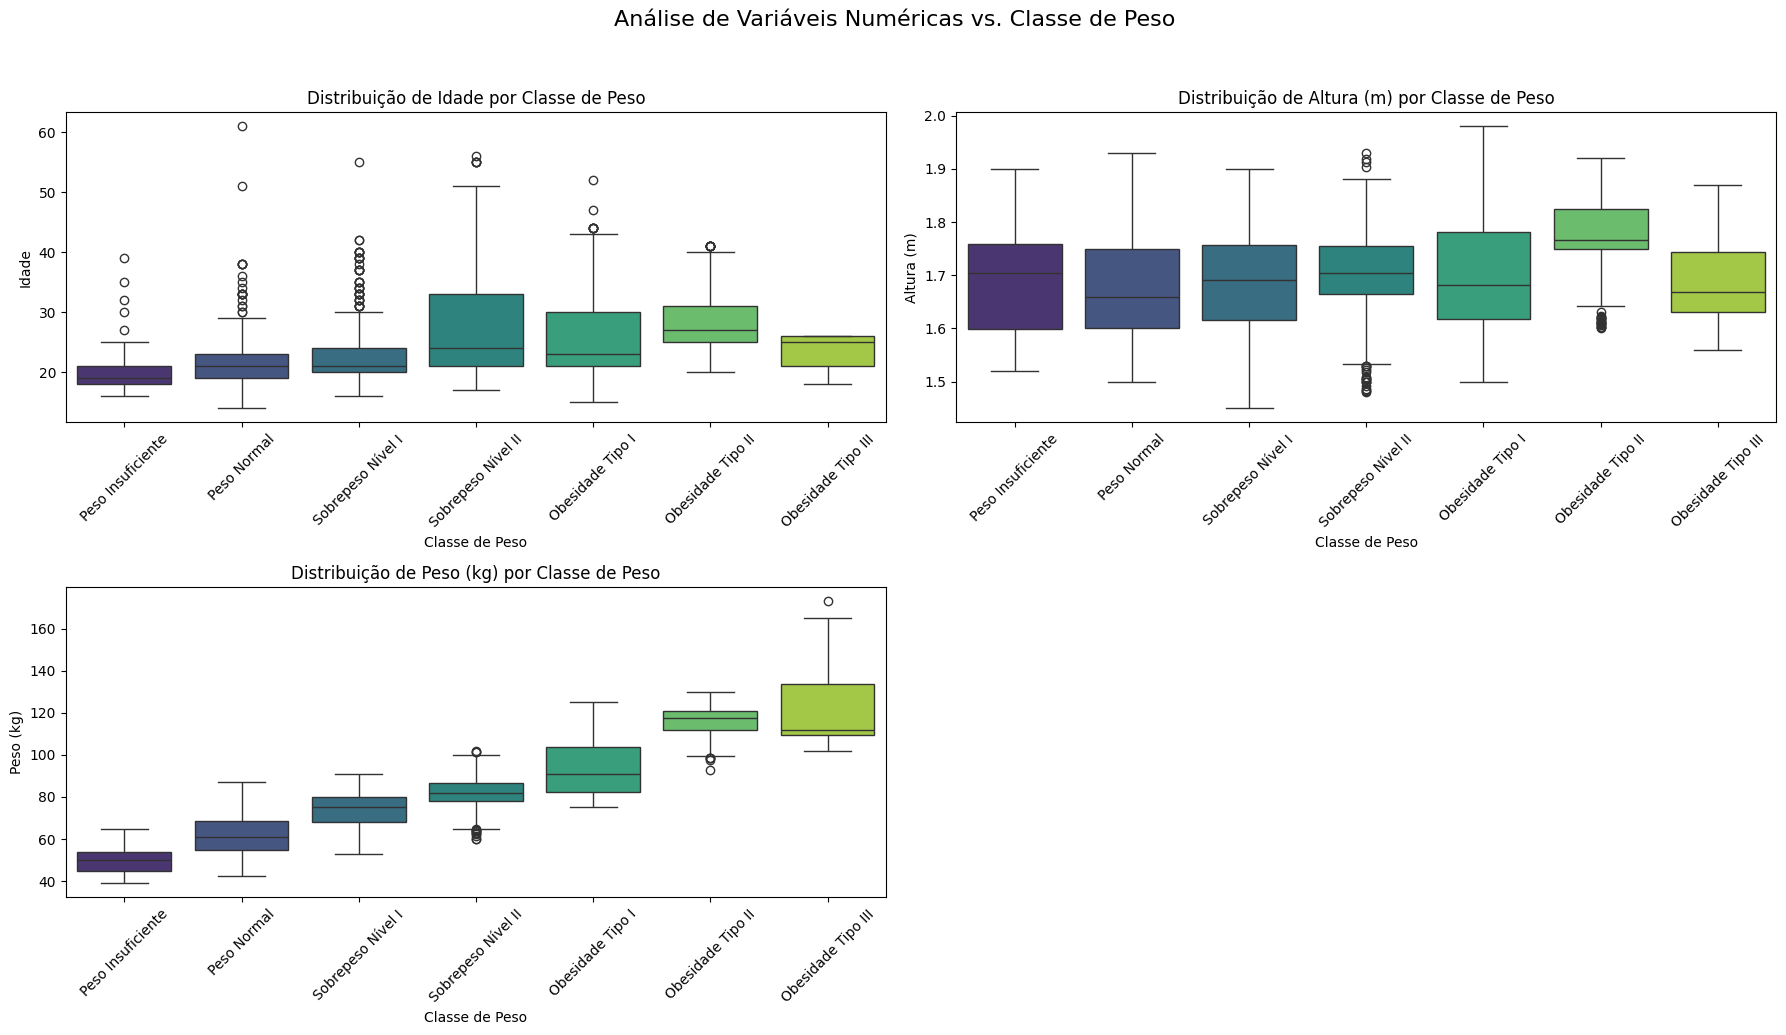

Boxplots salvos em 'reports/figures/'.


In [134]:
print("\nAnalisando a distribuição das variáveis numéricas entre as diferentes classes de peso corporal:")

#Definindo a ordem das classes de peso corporal (do mais leve ao mais grave)
ordem_classes = [
    'Insufficient_Weight', 
    'Normal_Weight',
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

#Filtro para classes presentes no DataFrame
ordem_presente = [c for c in ordem_classes if c in df['classe_peso_corporal'].unique()]

#Traduzindo a ordem para os gráficos
ordem_traduzida = [mapa_nomes.get(c, c) for c in ordem_presente]

#Variáveis numéricas para análise
variaveis_numericas = ['idade', 'altura_m', 'peso_kg']

#Define o caminho da pasta onde as imagens serão salvas, usando a raiz do projeto
output_dir = os.path.join(project_root, 'reports', 'figures')
os.makedirs(output_dir, exist_ok=True)
plt.figure(figsize=(18, 10))

for i, var in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 2, i)

    y_traduzido = mapa_nomes.get(var, var)
    x_traduzido = mapa_nomes.get('classe_peso_corporal', 'classe_peso_corporal')

    #Criando um DataFrame temporário para tradução dos valores da classe de peso corporal
    df_plot = df.copy()
    df_plot[x_traduzido] = df_plot['classe_peso_corporal'].map(mapa_nomes)
    df_plot.rename(columns={var: y_traduzido}, inplace=True)

    sns.boxplot(
        x=x_traduzido, 
        y=y_traduzido, 
        data=df_plot, 
        order=ordem_traduzida,
        palette='viridis'
    )
    plt.title(f'Distribuição de {y_traduzido} por {x_traduzido}')
    plt.xlabel(x_traduzido)
    plt.ylabel(y_traduzido)
    plt.xticks(rotation=45)

plt.suptitle('Análise de Variáveis Numéricas vs. Classe de Peso', fontsize=16, y=1.03)
plt.tight_layout()
# Salva a figura no diretório criado usando os.path.join (mais seguro)
plt.savefig(os.path.join(output_dir, 'boxplots_numericas_vs_alvo.png'))
plt.show()
print("Boxplots salvos em 'reports/figures/'.")

#### Hábitos específicos (historico familiar, comer calorias, atividade física) mostram relação com a classe de peso?


Analisando como hábitos específicos variam entre as diferentes classes de peso corporal:


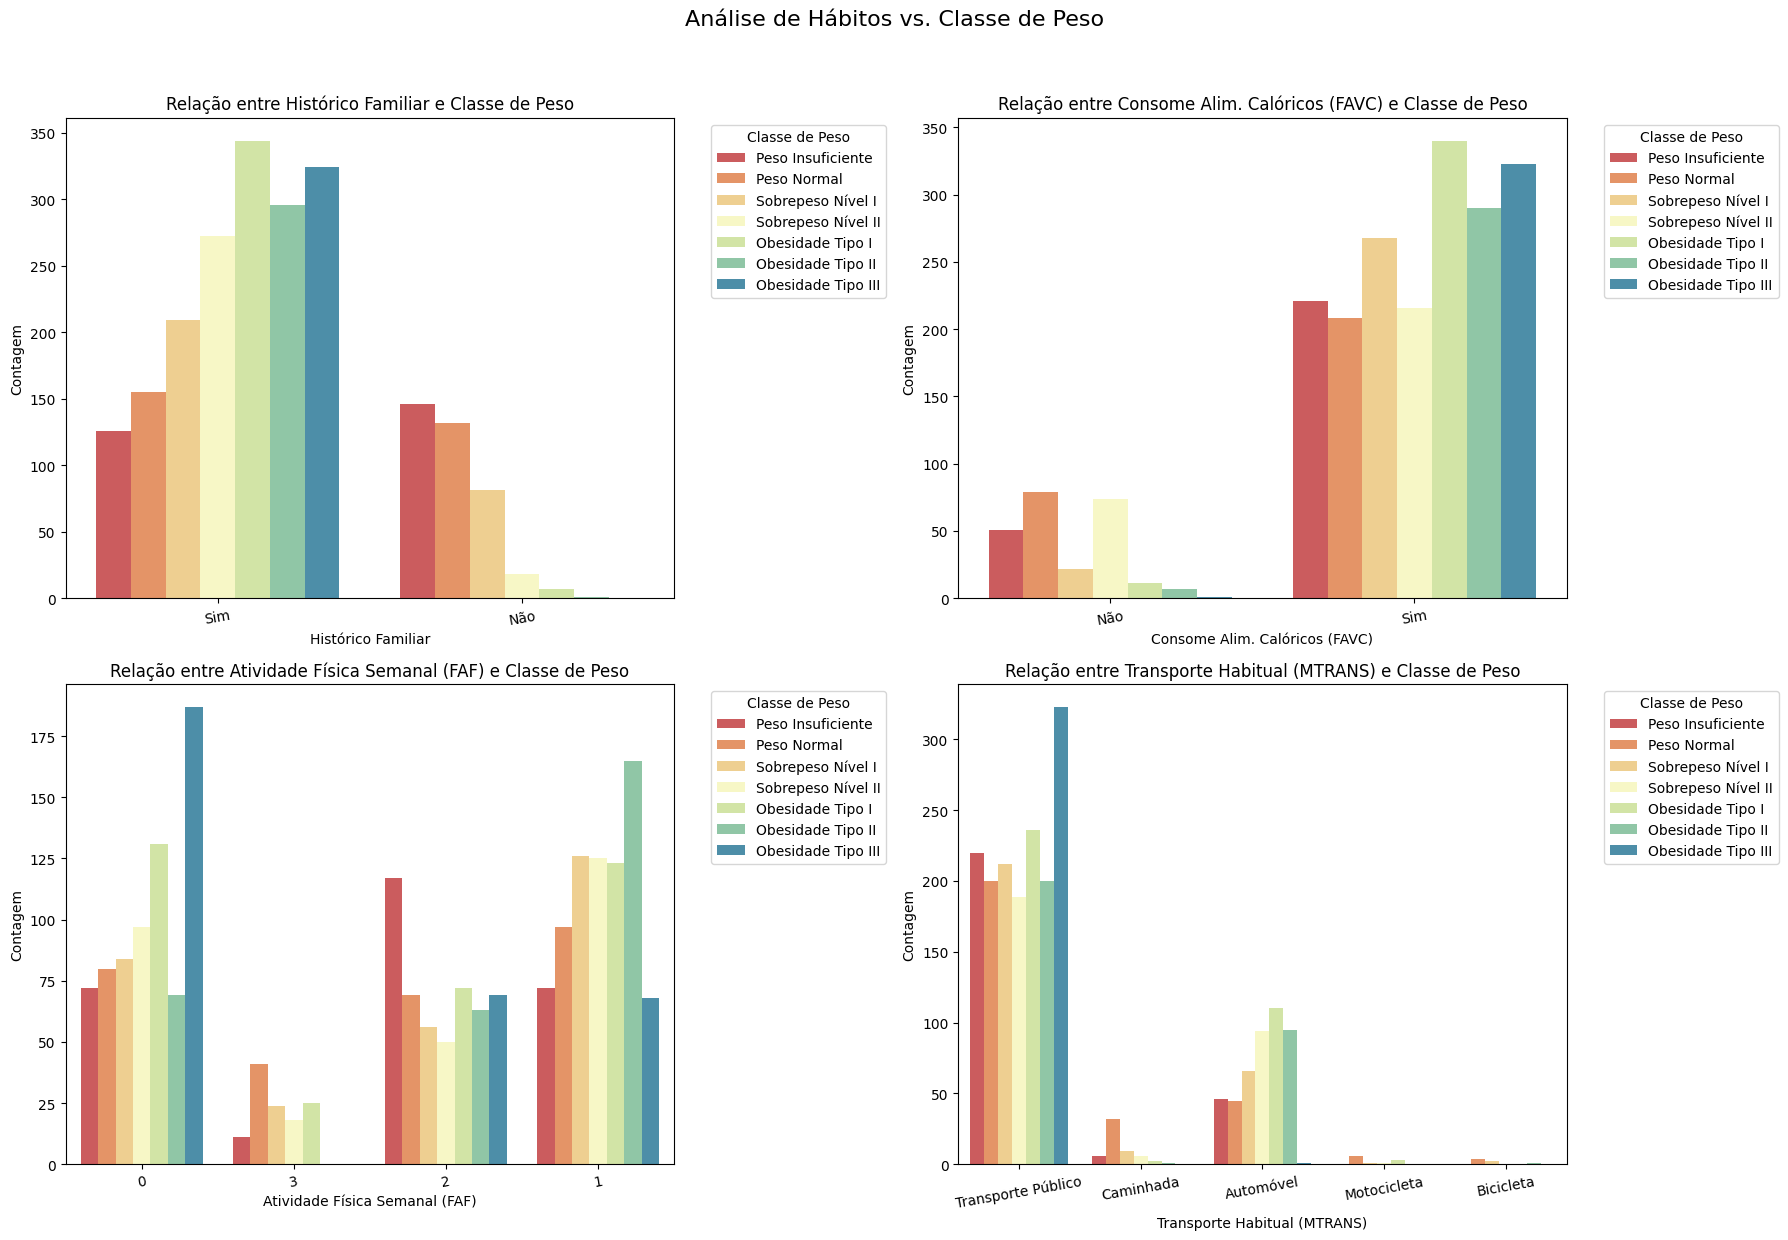

Countplots salvos em 'd:\Cursos\FIAP\obesity_project\reports\figures'.

Análise exploratória avançada concluída.
Insights preliminares gerados e prontos para o Painel Analítico.


In [135]:
print("\nAnalisando como hábitos específicos variam entre as diferentes classes de peso corporal:")
#Variáveis para plotar
features_categoricas_chave = [
    'historico_familiar', 
    'consumo_frequente_alimentos_caloricos', 
    'frequencia_semanal_atividade_fisica',
    'transporte_habitual'
]

#Define um tamanho de figura dinâmico
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features_categoricas_chave, 1):
    plt.subplot(2, 2, i)
    
    #Traduz o nome da feature X
    x_traduzido = mapa_nomes.get(feature, feature)
    #Traduz o 'hue' (o alvo)
    hue_traduzido = mapa_nomes.get('classe_peso_corporal', 'classe_peso_corporal')
    
    #Cria um DataFrame temporário (df_plot)
    df_plot = df.copy()
   
    #Converte as colunas categóricas para string (object) ANTES de mapear.
    coluna_feature_str = df_plot[feature].astype(str)
    coluna_alvo_str = df_plot['classe_peso_corporal'].astype(str)

    #Mapeia/Traduz os valores das colunas
    df_plot[x_traduzido] = coluna_feature_str.map(mapa_nomes).fillna(coluna_feature_str)
    df_plot[hue_traduzido] = coluna_alvo_str.map(mapa_nomes).fillna(coluna_alvo_str)
    #Plotagem do countplot
    sns.countplot(
        data=df_plot, 
        x=x_traduzido, 
        hue=hue_traduzido,
        palette='Spectral',
        hue_order=ordem_traduzida
    )
    plt.title(f'Relação entre {x_traduzido} e {hue_traduzido}')
    plt.xlabel(x_traduzido)
    plt.ylabel('Contagem')
    plt.xticks(rotation=10)
    plt.legend(title=hue_traduzido, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Análise de Hábitos vs. Classe de Peso', fontsize=16, y=1.03)
plt.tight_layout()
#Salva a figura no mesmo diretório
plt.savefig(os.path.join(output_dir, 'countplots_categoricas_vs_alvo.png'))
plt.show()
print(f"Countplots salvos em '{output_dir}'.")

#Conclusão da EDA
print("\nAnálise exploratória avançada concluída.")
print("Insights preliminares gerados e prontos para o Painel Analítico.")

#### Salvando o obesity_silver no banco de dados PostgreSQL.

In [139]:
from sqlalchemy import create_engine
from dotenv import load_dotenv

#Carrega variáveis do .env
load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST", "localhost")
DB_PORT = os.getenv("DB_PORT", "5432")
DB_NAME = os.getenv("DB_NAME")

#Criando conexão com o banco
engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

#Nome da tabela
silver_table_name = "obesity_silver"

#Salvando o dataframe no PostgreSQL
df.to_sql(silver_table_name, engine, index=False, if_exists='replace')

print(f"✅ Tabela '{silver_table_name}' salva com sucesso no PostgreSQL.")


✅ Tabela 'obesity_silver' salva com sucesso no PostgreSQL.


---

## ✅ Conclusão da Análise Exploratória

A etapa de **Análise Exploratória de Dados (EDA)** foi concluída com sucesso, resultando em um conjunto de dados limpo, padronizado e pronto para ser utilizado nas próximas fases do pipeline.

Principais entregas desta etapa:
- Padronização dos tipos de dados (*int*, *float*, *category*)  
- Identificação e tratamento de valores ausentes e inconsistências  
- Análise visual das distribuições e correlações  
- Criação e salvamento da **Camada Silver** no PostgreSQL  

Na sequência, inicia-se a etapa de **engenharia de atributos (Camada Gold)**, onde serão criadas novas variáveis derivadas — como o cálculo do **IMC (Índice de Massa Corporal)** — e preparada a base final para treinamento dos modelos preditivos.